# Astroquerys

- In this notebook I will log into the Gaia archive as a registered ESA user
- Use a query to load all the necessary data (from TGAS) to project the Gaia stars at Fiske.
- This query will filter data that has a parallax error >40%
- This data will be saved as a .vot file

## This notebook can be used to request information with querys and save it as a table to upload on future notebooks


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import astropy.units as u 
from astropy.coordinates import SkyCoord
from astropy.units import Quantity #Quantity is a number with an associated unit
import astropy.table
import astropy.io.ascii

In [3]:
from astroquery.gaia import Gaia
#Gaia.login(user='libarrap', password='Llavigne.614') #log into the ESA website

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


In [4]:

tables = Gaia.load_tables(only_names=True)
for table in (tables):
    print (table.get_qualified_name())

Retrieving tables...
Parsing tables...
Done.
public.public.dual
public.public.hipparcos
public.public.hipparcos_newreduction
public.public.hubble_sc
public.public.igsl_source
public.public.igsl_source_catalog_ids
public.public.tycho2
tap_schema.tap_schema.columns
tap_schema.tap_schema.key_columns
tap_schema.tap_schema.keys
tap_schema.tap_schema.schemas
tap_schema.tap_schema.tables
gaiadr1.gaiadr1.aux_qso_icrf2_match
gaiadr1.gaiadr1.ext_phot_zero_point
gaiadr1.gaiadr1.allwise_best_neighbour
gaiadr1.gaiadr1.allwise_neighbourhood
gaiadr1.gaiadr1.gsc23_best_neighbour
gaiadr1.gaiadr1.gsc23_neighbourhood
gaiadr1.gaiadr1.ppmxl_best_neighbour
gaiadr1.gaiadr1.ppmxl_neighbourhood
gaiadr1.gaiadr1.sdss_dr9_best_neighbour
gaiadr1.gaiadr1.sdss_dr9_neighbourhood
gaiadr1.gaiadr1.tmass_best_neighbour
gaiadr1.gaiadr1.tmass_neighbourhood
gaiadr1.gaiadr1.ucac4_best_neighbour
gaiadr1.gaiadr1.ucac4_neighbourhood
gaiadr1.gaiadr1.urat1_best_neighbour
gaiadr1.gaiadr1.urat1_neighbourhood
gaiadr1.gaiadr1.cepheid

#####  table you want to use = gaiadr1.gaiadr1.tgas_source

In [5]:
#extract useful imformation without uploading the whole table...
job = Gaia.launch_job_async("SELECT parallax,phot_g_mean_flux, ra,dec,phot_g_mean_mag,pmra,pmdec \
FROM gaiadr1.tgas_source \
WHERE abs(parallax_error/parallax)<0.40" \
, dump_to_file=False)

Launched query: 'SELECT parallax,phot_g_mean_flux, ra,dec,phot_g_mean_mag,pmra,pmdec FROM gaiadr1.tgas_source WHERE abs(parallax_error/parallax)<0.40'
Retrieving async. results...


Query finished.


In [31]:
r = job.get_results()
len(r)

1603568

Text(0.5,1,'RA and Dec')

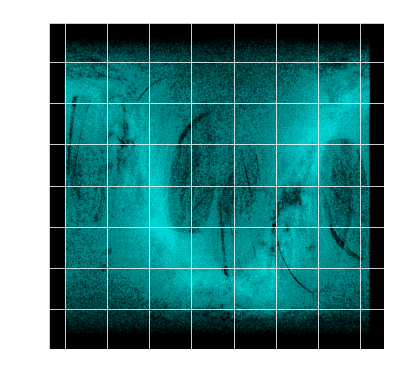

In [7]:
plt.figure(figsize=(6,6))
plt.style.use('dark_background')
#plt.subplot(111, projection="aitoff")
plt.scatter(r['ra'],r['dec'],color='aqua',s=0.5, alpha=0.025)
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.grid(True)
plt.title('RA and Dec')

## Write the data to a table to upload on future notebooks

In [8]:
parallax = r['parallax'].data
flux = r['phot_g_mean_flux'].data
RA = r['ra'].data
DEC = r['dec'].data
magnitude = r['phot_g_mean_mag'].data 
pmRA =r['pmra']
pmDEC = r['pmdec']

In [9]:
table = astropy.table.Table([parallax, RA, DEC, flux, magnitude,pmRA,pmDEC],
        names=['Parallax', 'RA', 'DEC', 'Flux', 'Magnitude','pmRA','pmDEC'])

In [10]:
astropy.io.ascii.write(table, 'TableFromQueryTGAS.dat',format='fixed_width',delimiter='\t')

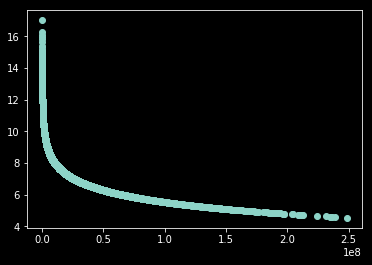

In [11]:
plt.scatter(flux,magnitude)

## Create querys to get more stuff you need and then write them out to a table

- using "2" to not mix lists accidentally
- the dr1 doesnt all come with parallax or proper motions... so work with DR2

In [33]:
job2 = Gaia.launch_job_async("SELECT parallax,phot_g_mean_flux, ra,dec,phot_g_mean_mag,pmra,pmdec \
FROM gaiadr2.gaia_source \
WHERE phot_g_mean_mag<12" \
, dump_to_file=False)


Launched query: 'SELECT parallax,phot_g_mean_flux, ra,dec,phot_g_mean_mag,pmra,pmdec FROM gaiadr2.gaia_source WHERE phot_g_mean_mag<12'


Exception: 507

In [27]:
r2 = job2.get_results()
len(r2)

3000000

In [18]:
parallax2 = r2['parallax'].data
flux2 = r2['phot_g_mean_flux'].data
RA2 = r2['ra'].data
DEC2 = r2['dec'].data
magnitude2 = r2['phot_g_mean_mag'].data 
pmRA2 =r2['pmra'].data
pmDEC2 = r2['pmdec'].data

In [20]:
table2 = astropy.table.Table([parallax2, RA2, DEC2, flux2, magnitude2,pmRA2,pmDEC2],
        names=['Parallax', 'RA', 'DEC', 'Flux', 'Magnitude','pmRA','pmDEC'])


In [22]:
astropy.io.ascii.write(table2, 'ADQLtableDR2.dat',format='fixed_width',delimiter='\t')